In [8]:
import pandas as pd
from sudulunu.helpers import pp, make_num, dumper
import os 

In [9]:
def combine_from_folder(pathos):
  
  listo = []
  
  fillos = os.listdir(pathos)
  fillos = [pathos + '/' + x for x in fillos if '.csv' in x]
  # print(fillos)

  city_dicto = {}
  for city in fillos:
    city_dicto[city] = city.replace("data/", '').replace('.csv', '')
  
  # print(city_dicto)

  for fillo in fillos:
    inter = pd.read_csv(fillo)

    temp_col = [x for x in inter.columns.tolist() if 'time' in x.lower()]
    inter.rename(columns={temp_col[0]: "Time"}, inplace=True)
    inter['City'] = city_dicto[fillo]

    listo.append(inter)

  cat = pd.concat(listo)

  return cat

data = combine_from_folder('data')


In [10]:
df = data.copy()
# 'Time', 'Temp (°C)', 'Feels Like (°C)', 'Humidity(%)', 
# 'Wind Direction', 'Wind Speed (km/h) (knots)', 'Wind Gust (km/h) (knots)', 
# 'Pressure (hPa)', 'Rainfall since 9 am (mm)', 'Date', 'City'

df = df[['Time', 'Temp (°C)', 'Date','City']]
# df = df[['Time', 'Feels Like (°C)', 'Date','City']]

# pp(df)

### Only keep the whole hour data
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M %p')
# df = df[df['Time'].dt.minute.eq(0) & df['Time'].dt.second.eq(0) & df['Time'].dt.hour.gt(9)]
df = df[df['Time'].dt.minute.eq(0) & df['Time'].dt.second.eq(0)]


In [11]:
listo = []
# for city in df['City'].unique().tolist():
#     inter = df.loc[df['City'] == city].copy()
#     inter = make_num(inter, 'Temp (°C)')
#     grp = inter.groupby(by=['Time'])['Temp (°C)'].mean().reset_index()
#     grp['']
#     listo.append(grp)

# cat = pd.concat(listo)

# df = make_num(df, 'Feels Like (°C)')
# grp = df.groupby(by=['City', 'Time'])['Feels Like (°C)'].mean().reset_index()

df = make_num(df, 'Temp (°C)')
grp = df.groupby(by=['City', 'Time'])['Temp (°C)'].mean().reset_index()
grp.sort_values(by=['City', 'Time'], ascending=True, inplace=True)



grp['Time'] = grp['Time'].dt.strftime("%H:%M")

# pp(grp)

In [12]:
piv = pd.pivot(grp, index='City', columns='Time').reset_index()

pp(piv)

           City  Temp (°C)                                              \
Time                 00:00      01:00      02:00      03:00      04:00   
0      Adelaide  22.442857  22.071429  21.271429  20.957143  20.742857   
1      Brisbane  21.800000  21.471429  21.357143  21.285714  20.857143   
2      Canberra  15.385714  14.228571  14.185714  13.942857  12.842857   
3        Hobart  16.185714  15.971429  15.642857  15.400000  14.914286   
4     Melbourne  19.885714  19.557143  19.371429  18.785714  18.685714   
5         Perth  22.085714  21.800000  21.028571  20.714286  19.757143   
6        Sydney  21.000000  20.971429  20.371429  19.971429  19.614286   

                                                  ...                        \
Time      05:00      06:00      07:00      08:00  ...      14:00      15:00   
0     20.185714  19.642857  20.316667  21.416667  ...  30.200000  31.014286   
1     20.585714  20.600000  21.466667  23.250000  ...  28.014286  27.585714   
2     12.628571  

<AxesSubplot: xlabel='None-Time', ylabel='City'>

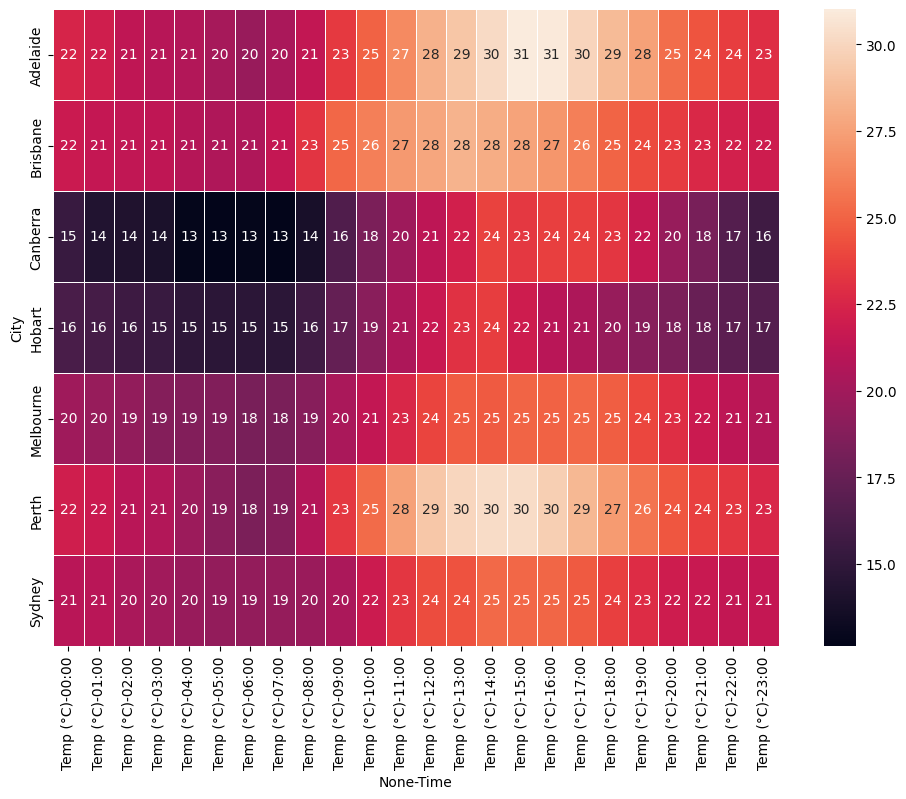

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

piv.set_index("City", inplace=True)

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(piv, annot=True, linewidth=0.5)

        City      Range
6      Perth  11.871429
1   Adelaide  11.371429
3   Canberra  11.171429
4     Hobart   8.838095
2   Brisbane   7.714286
5  Melbourne   6.871429
7     Sydney   5.814286
['City', 'Range']


/var/folders/1h/4w391kn52y51w5mmd37_xfn80000gq/T/ipykernel_45205/2690026419.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  biv = biv.append((biv.max(numeric_only=True) - biv.min(numeric_only=True)).rename("Range"))


<AxesSubplot: xlabel='City', ylabel='Range'>

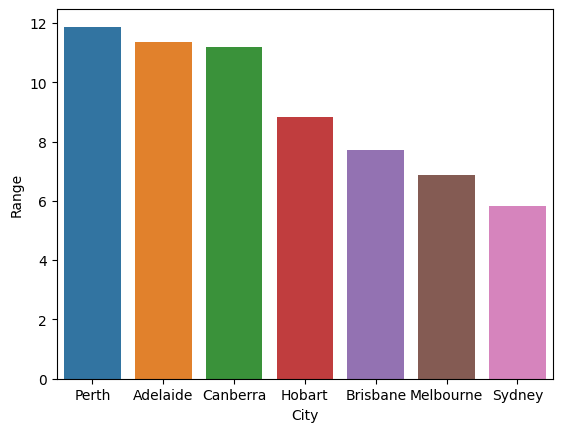

In [14]:
biv = pd.pivot(grp, index='Time', columns='City').reset_index()

biv = biv.append((biv.max(numeric_only=True) - biv.min(numeric_only=True)).rename("Range"))
biv = biv.loc[biv.index == 'Range']

biv = biv.T.reset_index()
biv = biv[1:]
biv = biv[['City', 'Range']]
biv.sort_values(by=['Range'], inplace=True, ascending=False)

pp(biv)

sns.barplot(data=biv, x="City", y="Range")